# Подключение библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import os

import re
import pymorphy2
import nltk
from nltk.corpus import stopwords

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# задаем директорию
file_path = '../datasets/'

# Датасеты команды

## Датасет команды 2

In [3]:
dataset_from_team_2 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_2.csv'), index_col=0)

In [4]:
dataset_from_team_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9004 entries, 0 to 9003
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   url        9004 non-null   object
 1   text       9004 non-null   object
 2   user_head  9004 non-null   object
 3   likes      9004 non-null   object
 4   comments   9004 non-null   int64 
 5   reposts    9004 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 492.4+ KB


In [5]:
# Преобразование в другой тип
dataset_from_team_2['likes'] = dataset_from_team_2['likes'].str.replace(',', '.')

dataset_from_team_2['likes'] = dataset_from_team_2['likes'].astype(float)

In [6]:
# Проверим на наличие дубликатов 
dataset_from_team_2.duplicated().sum()

72

In [7]:
# Устраняем их
dataset_from_team_2.drop_duplicates(inplace=True)

In [8]:
# Проверка на пропущенные значения
dataset_from_team_2.isna().sum()

url          0
text         0
user_head    0
likes        0
comments     0
reposts      0
dtype: int64

In [9]:
display(dataset_from_team_2.head())

display(dataset_from_team_2.tail())

,url,text,user_head,likes,comments,reposts
0,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,Кстати говоря. Теперь подкаст Миражи доступен в соцсети Вконтакте: https://lnkd.in/gKkrJX9Я наконец разобрался как туда прикрутить RSS :-) #podcast #миражи,Head of Design,1.0,0,0
1,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,I’m #hiring. Know anyone who might be interested?,Head of Design,1.0,0,0
2,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,"Хэй честной народ! Ищу векторного иллюстратора на проект, с возможным длительным сотрудничеством по итогу. Можно удаленно. Уровень иллюстраций не хуже чем в примере https://lnkd.in/gkrvhxYРепост, пожалуйста)Если ты умеешь так рисовать, напиши мне в личку :-)Hey! I am looking for an Illustrator who can help us with a project! You need to have skills like in the example below or upper. Text me to discuss prices and due :-)#вакансия #vacancy #illustration #иллюстрация #project #проект",Head of Design,6.0,0,0
3,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,"Новый пост подкаста ""Миражи"" на всех платформах:В аудио: https://lnkd.in/giWuSVNВ инстаграме: https://lnkd.in/gbV6yxKН #automotive # # #cars #а патреоне: https://lnkd.in/gfShqTU#саморазвитие #психология #психологиячеловека #психологияжизни #психологияличности #личностныйрост #подкаст #подкастмиражи #маркетинг #осознанность #мысли #мысливслух #установки #влияние #подсознаниеИспользованные звуки, музыка и картинки:Аудиоцитата из фильма ""Формула любви"" Марка ЗахароваJardins du Luxembourg by Jahzzar is licensed under a Attribution-ShareAlike 3.0 International License.prisoner by Luis Prado from the Noun Project",Head of Design,1.0,0,0
4,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,"Подкаст Миражи, Эпизод 13Ошибка невозвратных затратpodcast.ru/1539345144#подкаст #podcast #it #podcasts #psychology #психология #miragespodcast",Head of Design,2.0,0,0


,url,text,user_head,likes,comments,reposts
8999,https://www.linkedin.com/in/mykhailo-yurchernko/recent-activity/all/,"Hello. Really liked the post. There are many design principles, and there are many different layouts. This cheat sheet is great. I decided to share with you. I wish everyone peace and goodness#Market #Cloth #online #store #shop #Cloth #Market #Ecommerce #work #learning #design #onlineclasses #online #color #red #darkmode #elearning #crypto #marketplace #blockchain #design #minimal #cryptocurrency #nft #webdesign #trendyui #web3 #nfts #brand #psychology#fintech #paymentgateway #paymentsecurity #onlineearning#realestate #property #buysell #renthouse #money #blue #home#realestatecompany #realeastate #builder #building #agenceweb#digitalagency #agencywork #agency #digital #homepage#google #googleuxdesign #userexperience #uxdesign #uxdesign #googlecertification #uxdesign #learningexperiencedesign #figma #adobexd #userresearch #uidesign #designcommunity #ux #designer #design #web3design #skills #skill #productdesign #product #processes #restaurant #opencloud #animation#resources #resourcesharing #color #colour #font #ui #ux #uxui #webdesign #webdeveloper #figma #adobeXD #sketch #photoshop #webdesigner #designinspiration #interface #website #behance #dribbble #javascript #graphicdesign #userexperience #userinterface #css #appdesign #design #html #uidesign #webdesigner #uxdesign #webdevelopment #websitedesign #uxtrends #uiuxdesigner #userinterface #designtips #webdeveloper #uxinspiration #uiuxdesign #uxresearch #dailydesign #landingpage #designchallenge #uiinspiration #wireframe #webdesigner #website #interface #uitrends #designinspiration #dailyui #productdesign #uxuidesign #creative #uxlearn #uilearn #uiuxlearn #bitcoin #cryptocurrency #crypto #blockchain #ethereum #cryptocurrency #Softui #glassmorphism #NFTs #SoftwareDeveloper #InternationalSpaceStation #Windows #Webflow #android #apple #checklist #font #rule #adobefigma #nocodeplatform #nocode #webflow #fashion #commerce #ui8#shoppinglanding #commerce #shopify #email",UX/UI Designer,1.0,0,0
9000,https://www.linkedin.com/in/mykhailo-yurchernko/recent-activity/all/,Hi friends.🙂👋This is my new website. Come to visit.🌎👨🏻‍💻 https://mikedesign.pro/Good mood and peace to everyone!#warinukraine #design #app #ukraine #uidesign #apple #art #ux #freelance #ui #kyiv #interiordesign #userinterface #macbook #workplace #mykolaiv #stopwarinukraine #lending #appdesign #easymac #дизайн #phone #kiev #Imlookingforajob #interface #designer #behance #iphone13 #figma #userexperience,UX/UI Designer,2.0,0,0
9001,https://www.linkedin.com/in/mykhailo-yurchernko/recent-activity/all/,Happy Defender of Ukraine Day!🇺🇦Thank you for what you do! Peace to all!🌐🇺🇦🙋‍♂️#warinukraine #design #app #ukraine #uidesign #glorytoukraine #art #ux #freelance #ui #kyiv #interiordesign #userinterface #itinukraine #workplace #kyiv #stopwarinukraine #lending #appdesign #easymac #дизайн #phone #kiev #stopwar #interface #designer #behance #iphone13 #figma #userexperience,UX/UI Designer,2.0,0,0
9002,https://www.linkedin.com/in/mykhailo-yurchernko/recent-activity/all/,"Hi friends. My old website crashed due to poor hosting. I am posting a link to a new website - which is under development.My advice to you if you yourself connect a website through WordPress:1. Deal with the most important plugins for the security, speed and vitality of the site. No need to install many plugins - only the most necessary! 2. Login and password should not be banal and easy to guess - ""admin"" or ""something related to your name"". 3. The content should be light - no photos higher than 400 kb. 4. Update plugins and WordPress - whatever you are hacked. 5. Choose a secure hosting and domain (you must register on the services where you buy). 6. If possible, consult with friends or professionals who are stronger than you in this activity. I am very grateful to Serhii and the Solvedfast studio for their help and the opportunity to convey infor

## Датасет команды 3

In [10]:
dataset_from_team_3 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_3.csv'), index_col=0)

In [11]:
dataset_from_team_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 487
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          304 non-null    object 
 1   status        304 non-null    object 
 2   company       304 non-null    object 
 3   url           304 non-null    object 
 4   text          304 non-null    object 
 5   likes_cnt     297 non-null    float64
 6   reposts_cnt   304 non-null    int64  
 7   comments_cnt  304 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 21.4+ KB


In [12]:
# Проверим на наличие дубликатов 
dataset_from_team_3.duplicated().sum()

48

In [13]:
# Устраняем их
dataset_from_team_3.drop_duplicates(inplace=True)

In [14]:
# Проверка на пропущенные значения
dataset_from_team_3.isna().sum()

name            0
status          0
company         0
url             0
text            0
likes_cnt       7
reposts_cnt     0
comments_cnt    0
dtype: int64

In [15]:
dataset_from_team_3 = dataset_from_team_3.rename(columns={'name': 'user_name', 'status': 'user_head', 'company': 'user_work', 'likes_cnt': 'likes', 'reposts_cnt': 'reposts', 'comments_cnt': 'comments'})

In [16]:
display(dataset_from_team_3.head())

display(dataset_from_team_3.tail())

,user_name,user_head,user_work,url,text,likes,reposts,comments
0,Michil Egorov,Middle Software Engineer - Yandex,Yandex,https://www.linkedin.com/in/michilegorov,Всем привет!Выпустил свою первую статью на хабр!https://lnkd.in/dt9N6D7BСтатья про историю и технологии разработки игры https://guess-word.com и как мы создали игру с элементами машинного обучения и вышли в ноль за 2 месяцаПри внимательном прочтении вы даже сможете запустить первую версию игры!,17.0,0,0
1,Michil Egorov,Middle Software Engineer - Yandex,Yandex,https://www.linkedin.com/in/michilegorov,"Если вам интересно позалипать в слова, я запустил игру!https://guess-word.com/Особенно понравится братьям NLP-шникам)",6.0,0,2
2,Michil Egorov,Middle Software Engineer - Yandex,Yandex,https://www.linkedin.com/in/michilegorov,"Если вам интересно позалипать в слова, я запустил игру!https://guess-word.com/Особенно понравится братьям NLP-шникам)",17.0,6,0
3,Michil Egorov,Middle Software Engineer - Yandex,Yandex,https://www.linkedin.com/in/michilegorov,"Hi everyone - I am looking for a new role and would appreciate your support. Thank you in advance for any connections, advice, or opportunities you can offer. #OpenToWork",2.0,0,0
4,Diana Bogdanova,IT Recruiter,X5 Digital,https://www.linkedin.com/in/diana-bogdanova-026860206,I’m happy to share that I’m starting a new position as an IT Recruiter!,34.0,0,5


,user_name,user_head,user_work,url,text,likes,reposts,comments
450,Matvey Popov,Software Engineer at Yandex,Yandex,https://www.linkedin.com/in/ma-popovv,Quote of the day. #QOTD,6.0,554,87
451,Matvey Popov,Software Engineer at Yandex,Yandex,https://www.linkedin.com/in/ma-popovv,How To Develop REST CRUD API Using Spring Boot?https://lnkd.in/d9i_A_qc#spring #springframework #javaspring #javaspringboot #springmvc #springboot #springdata #springcloud #springmvc #springsecurity #java #javaprogramming #javaprogramminglanguage #javadeveloper #javadevelopment #javadevelopers #javadeveloperjobs #javabackend #javabackenddeveloper #javafullstack #javafullstackdeveloper #javadeveloper #javaprogrammer #javatraining #javaee #j2ee #j2eedeveloper #java8 #microservices #microservicesarchitecture #microservice #microservicios #javamicroservices,635.0,33,0
452,Matvey Popov,Software Engineer at Yandex,Yandex,https://www.linkedin.com/in/ma-popovv,"I received a message from a lady who retired from working for ""a very mean tyrant boss."" These were her words in quotations. She realizes now, that the stress, anxiety, and yelling that she endured was not worth 21 years of her life. She mentioned that his reason for running his business was always that he always did things this way since the 1980s. She wishes she was brave enough to seek better for herself.This made me think:▪️A salary does not guarantee you peace of mind. Change can be good.The most dangerous phrase is: “We’ve always done it this way.”▪️Finding ways to improve can help you avoid regrets later.▪️Your happiness and peace are priceless. Do you agree?- Rachel Mitchell ©✔️Follow me on LinkedIn daily for inspiration and original content.🔺 It is a pleasure to connect people from all industries .You can hire me for a private 1:1 consultation & to connect you.🔺Click the Network-NetWorth link at the top of my profile and let me know what you need.Send a follow request to my private instagram: @Lady_LongevityI can connect with you there too.#rachelmitchell my hashtag: #LadyLongevity #NetworkNetWorthx100 connecting innovative people in tech,retail, and sustainability",1.0,214,380
453,Matvey Popov,Software Engineer at Yandex,Yandex,https://www.linkedin.com/in/ma-popovv,"My Russian speaking friends keep getting discriminated due to the language they speak. To all of my friends globally, please remember few things:1. Russian speaking does not equal Russian. There were 15 countries in the USSR. All of those countries still have Russian speaking minorities. It doesn't mean they are Russian or identify themselves as Russian. Just like Irish does not equal English or Spanish does not equal Mexican.2. Russian does not equal aggressor. None of the Russians support the war. Some just don't understand what is happening due to the limited information that they are getting. There is no free media left in Russia.3. Ukrainians also speak Russian, some just Russian. Next time you tell a Russian speaker you wont serve them, think about which side you're taking. The person approaching you might have a relative sitting in the bomb shelter right now. 4. Russian name also does not equal Russian. My name is Russian. I was born in Latvia, my parents were born is Latvia. I have Latvian, Ukrainian, Polish, Turkish, Romanian and probably many more ethnicities in me. I grew up in Ireland. My Russian surname was inherited from my great grandfather who was a pacifist, he went through the war and wouldn't ever stand by what's happening right now. Many Ukrainians have Russian surnames too. 5. The anger you're translating on to innocent people is not going to solve the problem, it's going to create more problems and hatred. There are many ways to help, but hating on others is definitely not one of the ways.#StandWithUkraine 🇺🇦",0.0,0,0
454,Matvey Popov,Software Engineer at Yandex,Yandex,https://www.linkedin.com/in/ma-popovv,I’m happy to share that I’m starting a new position as Software Engineer at Tinkoff !,0.0,0,0


## Датасет команды 4

In [17]:
dataset_from_team_4 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_4.csv'), delimiter=';')

In [18]:
dataset_from_team_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url_user        1191 non-null   object 
 1   name            796 non-null    object 
 2   job             796 non-null    object 
 3   text_post       796 non-null    object 
 4   react_per_user  796 non-null    object 
 5   count_comments  796 non-null    float64
dtypes: float64(1), object(5)
memory usage: 56.0+ KB


In [19]:
# Проверим на наличие дубликатов 
dataset_from_team_4.duplicated().sum()

84

In [20]:
# Устраняем их
dataset_from_team_4.drop_duplicates(inplace=True)

In [21]:
# Проверка на пропущенные значения
dataset_from_team_4.isna().sum()

url_user            0
name              317
job               317
text_post         317
react_per_user    317
count_comments    317
dtype: int64

In [22]:
# Устраняем их
dataset_from_team_4.dropna(inplace=True)

In [23]:
dataset_from_team_4 = dataset_from_team_4.rename(columns={'url_user': 'url', 'name': 'user_name', 'job': 'user_head', 'text_post': 'text', 'react_per_user': 'likes', 'count_comments': 'comments'})

In [24]:
dataset_from_team_4['likes'] = dataset_from_team_4['likes'].str.replace("'", ',')
dataset_from_team_4['likes'] = dataset_from_team_4['likes'].str.replace(" ", '')
dataset_from_team_4['likes'] = dataset_from_team_4['likes'].str.replace('[\[\]]+', '', regex=True)

In [25]:
def calculate_median(row):
    # Удаление всех символов, кроме цифр, из строки
    numbers = ''.join(filter(str.isdigit, row))
    
    # Преобразование строки с числами в список целочисленных значений
    numbers_list = list(map(int, numbers))
    
    # Расчет медианного значения
    median_value = np.median(numbers_list)
    
    return median_value

In [26]:
# Применение функции к замену колонки likes на кол-во лайков
dataset_from_team_4['likes'] = dataset_from_team_4['likes'].apply(calculate_median)

D:\Program File\Anaconda\envs\Hackathon\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [27]:
display(dataset_from_team_4.head())

display(dataset_from_team_4.tail())

,url,user_name,user_head,text,likes,comments
0,https://www.linkedin.com/in/artem-reshetnikov-925143251/,Artem Reshetnikov,Data Analyst,['I love SQL.'],3.5,0.0
1,https://www.linkedin.com/in/korenevich/,Pavel Karanevich,Growth Evangelist | Entrepreneur | US Marketer | Advisor,['Приложение которое из голоса раскидывает задачи. Идея огонь!,2.0,0.0
4,https://www.linkedin.com/in/korenevich/,Pavel Karanevich,Growth Evangelist | Entrepreneur | US Marketer | Advisor,'Кто хорошо потрудился на этой неделетот я. Чего и вам желаю 😊,2.0,0.0
5,https://www.linkedin.com/in/korenevich/,Pavel Karanevich,Growth Evangelist | Entrepreneur | US Marketer | Advisor,'Сегодня была защита дипломных работ на кафедре технологического предпринимательства МФТИ. Мне посчастливилось быть научным руководителем и ментором сразу для двух фаундеров.Почему фаундеров? Потому что это не только дипломный проект. Это уже работающий хардварный девайскоторый совсем скоро увидит свет и высшая оценка диплома тому подтверждение. Тематика удивительнаяи меня очень вдохновляет: про ольфакторный дизайн что-то слышали? Погуглите обязательноесли нет. Что могу сказать про свои впечатления от менторства на кафедре: 🔥 Очень крутые преподаватели с живым опытом работы в бизнесеэто огонь просто! 💪 Студенты сильные и разносторонне развиты! 🧐 Проработка проектов очень глубокая. 👍 Организационные моменты на высоте.Сейчас работаю еще со студентами с первого курса и вижукак в процессе они загораются своей же идеей и действуют! А это тот самый путь к запуску своего проекта.В общемработать было приятно и легко. Ребят искренне поздравляю с новым этапом 🚀P.S. Волновалсякак будто бы сам защищался 😀#мфти #mipt #техпред,2.0,0.0
6,https://www.linkedin.com/in/korenevich/,Pavel Karanevich,Growth Evangelist | Entrepreneur | US Marketer | Advisor,'🔥Вот и приложение под iOS🔥 Очень ждал тк в мобильном браузере было неудобно.#chatgpt #openai #ios,2.0,0.0


,url,user_name,user_head,text,likes,comments
1186,https://www.linkedin.com/in/%D0%BE%D0%BB%D0%B5%D1%81%D1%8F-%D1%86%D0%B0%D1%80%D0%B5%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%86%D0%B5%D0%B2%D0%B0-748179237?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADrvc-gBOkDoqybZ93sYw_gTHsGQU27rlGw,Олеся Царегородцева,IT-researcher-Tinkoff - Looking for IOS/Android/mobile QA,'Всем приветловите дайджест вакансий для QA на этой неделе! Каждый найдет для себя что-то интересное) ▪️Инженер по тестированию (Backend) в Тинькофф Инвестиции(https://lnkd.in/gc5iB82Q) Тинькофф Инвестиции создали собственного уникального и технологичного онлайн-брокерасделали сложный финансовый продукт удобным для всех. Теперь в планах увеличить количество таких брокеров.▪️Инженер по тестированию (Mobile) в Тинькофф Мобильный Банк\xa0(https://lnkd.in/gKEfBV-c)Мобильный Банк — это основное мобильное приложение наших клиентов для взаимодействия с экосистемой Тинькофф. Это не только банковские операцииа мобильный операторлайфстайл-помощник и многое другое.▪️Инженер по тестированию в Tinkoff Black\xa0(https://lnkd.in/gkfvE-_b)Tinkoff Black — главный продукт в экосистеме Тинькоффкоторый является визитной карточкой. Благодаря ему происходит первое знакомство с нашей компанией и всеми продуктами.▪️Инженер по тестированию в Банковские продукты(https://lnkd.in/gNg4hv_c)Команда банковских продуктов разрабатывает продуктовую линейку для юридических лиц с нуля: РКОспецсчетадепозиты и копилкикредиты и коллекшен.Больше вакансий по этому направлению и другим смотрите на нашем карьерном сайте (https://lnkd.in/gFcmqEpQ).#дайджест_вакансий #QA_инженеры #qa #vacancy #Belarus_job,3.0,0.0
1187,https://www.linkedin.com/in/%D0%BE%D0%BB%D0%B5%D1%81%D1%8F-%D1%86%D0%B0%D1%80%D0%B5%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%86%D0%B5%D0%B2%D0%B0-748179237?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADrvc-gBOkDoqybZ93sYw_gTHsGQU27rlGw,Олеся Царегородцева,IT-researcher-Tinkoff - Looking for IOS/Android/mobile QA,'Открывается набор на осенние оплачиваемые стажировки Тинькофф Старт ⭐️Приглашаем студентов и начинающих специалистовготовых посвятить стажировке от 20 часов в неделюработать можно удаленно или из офиса Тинькофф. Отбор будет в два этапа: экзамен и собеседование с куратором выбранного направления. Стажировка оплачиваетсялучших пригласят на интервью в штат. Какие направления открыты: #аналитика#qaбэкенд-разработка (#Java#Scala#.Net#Golang)мобильная разработка (#iOS#Android)#SREфронтендмаркетинг и инвестиции. Ближе к старту программы список направлений может расшириться.Отборочные экзамены пройдут с 1 по 16 августаа выбрать направление и отправить заявку можно прямо сейчас: https://lnkd.in/e89AHqwC,3.0,0.0
1188,https://www.linkedin.com/in/%D0%BE%D0%BB%D0%B5%D1%81%D1%8F-%D1%86%D0%B0%D1%80%D0%B5%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%86%D0%B5%D0%B2%D0%B0-748179237?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADrvc-gBOkDoqybZ93sYw_gTHsGQU27rlGw,Олеся Царегородцева,IT-researcher-Tinkoff - Looking for IOS/Android/mobile QA,'Открывается набор на осенние оплачиваемые стажировки Тинькофф Старт ⭐️Приглашают студентов и начинающих специалистовготовых посвятить стажировке от 20 часов в неделюработать можно удаленно или из офиса Тинькофф. Отбор будет в два этапа: экзамен и собеседование с куратором выбранного направления. Стажировка оплачиваетсялучших пригласят на интервью в штат. Какие направления открыты: аналитикаQAбэкенд-разработка (JavaScala.NetGolang)мобильная разработка (iOSAndroid)SREфронтендмаркетинг и инвестиции. Ближе к старту программы список направлений может расшириться.Отборочные экзамены пройдут с 1 по 16 августаа выбрать направление и отправить заявку можно прямо сейчас: https://lnkd.in/etpNTYDN,3.0,0.0
1189,https://www.linkedin.com/in/%D0%BE%D0%BB%D0%B5%D1%81%D1%8F-%D1%86%D0%B0%D1%80%D0%B5%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%86%D0%B5%D0%B2%D0%B0-748179237?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADrvc-gBOkDoqybZ93sYw_gTHsGQU27rlGw,Олеся Царегородцева,IT-researcher-Tinkoff - Looking for IOS/Android/mo

## Датасет команды 8

### Часть 1

In [28]:
dataset_from_team_8_1 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_8_1.csv'), delimiter=';', index_col=0)

In [29]:
dataset_from_team_8_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 103
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   profile_url    98 non-null     object 
 1   name           98 non-null     object 
 2   works_at       98 non-null     object 
 3   exp_list       98 non-null     object 
 4   post           98 non-null     object 
 5   reactions_cnt  98 non-null     float64
 6   comments_cnt   98 non-null     float64
 7   post_url       98 non-null     object 
 8   posts_cnt      98 non-null     float64
dtypes: float64(3), object(6)
memory usage: 8.8+ KB


In [30]:
# Проверим на наличие дубликатов 
dataset_from_team_8_1.duplicated().sum()

13

In [31]:
# Устраняем их
dataset_from_team_8_1.drop_duplicates(inplace=True)

In [32]:
# Проверка на пропущенные значения
dataset_from_team_8_1.isna().sum()

profile_url      1
name             1
works_at         1
exp_list         1
post             1
reactions_cnt    1
comments_cnt     1
post_url         1
posts_cnt        1
dtype: int64

In [33]:
# Устраняем их
dataset_from_team_8_1.dropna(inplace=True)

In [34]:
dataset_from_team_8_1 = dataset_from_team_8_1.rename(columns={'post': 'text', 'profile_url': 'url', 'name': 'user_name', 'job':'user_head', 'works_at': 'user_head', 'exp_list': 'user_position', 'reactions_cnt': 'likes', 'comments_cnt': 'comments', 'posts_cnt': 'reposts'})

In [35]:
display(dataset_from_team_8_1.head())

display(dataset_from_team_8_1.tail())

,url,user_name,user_head,user_position,text,likes,comments,post_url,reposts
0,https://www.linkedin.com/in/ruslandubrovin/,Руслан Дубровин,Software Developer – Yandex,['Software Developer'Yandex'март 2019 г. – настоящее время · 4\xa0г. 4\xa0мес.'Lead Software Developer'TheQuestion'июль 2018 г. - авг. 2021 г. · 3\xa0г. 2\xa0мес.'Software Developer'Технократия (worked as outstaff for redmadrobot)'сент. 2017 г. - июнь 2018 г. · 10 мес.'Golang developer'infotech.group'нояб. 2016 г. - сент. 2017 г. · 11 мес.'Python developer'Cinarra Systems'апр. 2016 г. - нояб. 2016 г. · 8 мес.'],нет постов,0.0,0.0,нет постов,0.0
1,https://www.linkedin.com/in/grigory-kostin-aaa16061/,Grigory Kostin,Developer at Yandex,['Developer'Yandex'янв. 2015 г. – настоящее время · 8\xa0лет 6\xa0мес.'HeadHunter Group'2\xa0г.\xa05\xa0мес.'Senior Developer'апр. 2014 г. - дек. 2014 г. · 9 мес.'Developer'авг. 2012 г. - апр. 2014 г. · 1\xa0г. 9\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
2,https://www.linkedin.com/in/bard-10x/,Денис Ковалев,iOS App Developer – Tinkoff,['iOS Developer'Tinkoff · Полный рабочий день'май 2023 г. – настоящее время · 2 мес.'iOS App Developer'Saritasa · Полный рабочий день'сент. 2019 г. - апр. 2023 г. · 3\xa0г. 8\xa0мес.'iOS App Developer'Очень Интересно · Стажировка'февр. 2019 г. - март 2019 г. · 2 мес.'Android App Developer'Очень Интересно · Стажировка'авг. 2018 г. · 1 мес.'Android App Developer'Aspirity · Стажировка'июнь 2018 г. · 1 мес.'],нет постов,0.0,0.0,нет постов,0.0
3,https://www.linkedin.com/in/kirill-khrustitskii-b2712943/,Kirill Khrustitskii,Developer,['Разработчик'МТС · Полный рабочий день'янв. 2023 г. – настоящее время · 6 мес.'Гибридный формат работы'Unity Developer'Infusion Games · Полный рабочий день'июль 2021 г. - дек. 2022 г. · 1\xa0г. 6\xa0мес.'Разработчик игр Unity'янв. 2017 г. - июль 2021 г. · 4\xa0г. 7\xa0мес.'Руководитель инновационно-технологического центра'Саратовский Государственный Университет им. Н.Г. Чернышевского · Полный рабочий день'апр. 2013 г. - дек. 2020 г. · 7\xa0лет 9\xa0мес.'Разработка наноматериалов.'Программист С#'GALAKTIKA'сент. 2019 г. - апр. 2020 г. · 8 мес.'],Здравствуйтея в поиске новой карьерной возможности и буду признателен(а) за вашу поддержку. Заранее благодарю за все рекомендации контактовсоветы или возможностикоторые вы можете предложить. #OpenToWork,1.0,0.0,https://www.linkedin.com/feed/update/urn:li:activity:6712411515196194816,11.0
3,https://www.linkedin.com/in/kirill-khrustitskii-b2712943/,Kirill Khrustitskii,Developer,['Разработчик'МТС · Полный рабочий день'янв. 2023 г. – настоящее время · 6 мес.'Гибридный формат работы'Unity Developer'Infusion Games · Полный рабочий день'июль 2021 г. - дек. 2022 г. · 1\xa0г. 6\xa0мес.'Разработчик игр Unity'янв. 2017 г. - июль 2021 г. · 4\xa0г. 7\xa0мес.'Руководитель инновационно-технологического центра'Саратовский Государственный Университет им. Н.Г. Чернышевского · Полный рабочий день'апр. 2013 г. - дек. 2020 г. · 7\xa0лет 9\xa0мес.'Разработка наноматериалов.'Программист С#'GALAKTIKA'сент. 2019 г. - апр. 2020 г. · 8 мес.'],Unity Game Development Mini-Degree,0.0,0.0,https://www.linkedin.com/feed/update/urn:li:activity:6515468433906372608,11.0


,url,user_name,user_head,user_position,text,likes,comments,post_url,reposts
98,https://www.linkedin.com/in/aleksey-pikalov-javadeveloper/,Aleksey Pikalov,Java Developer - Bell Integrator,['Java Developer'Bell Integrator'апр. 2019 г. – настоящее время · 4\xa0г. 3\xa0мес.'Java Developer'Java Online Projects'июль 2018 г. - дек. 2018 г. · 6 мес.'Сотрудник отдела логистики'IKEA Group'февр. 2014 г. - нояб. 2018 г. · 4\xa0г. 10\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
99,https://www.linkedin.com/in/%D0%B0%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80-%D0%BA%D1%83%D0%B4%D0%B8%D0%BC%D0%BE%D0%B2-41658852/,Александр Кудимов,Python software developer,['Ведущий Разарботчик'МТС · Полный рабочий день'янв. 2020 г. – настоящее время · 3\xa0г. 6\xa0мес.'Ведущий эксперт-разработчик'SimbirSoft · Полный рабочий день'май 2019 г. - янв. 2020 г. · 9 мес.'Архитектура и разработка программного обеспечения.'Senior BE developer at Software Development'ООО «СИСКВАЛ» · Полный рабочий день'авг. 2017 г. - май 2019 г. · 1\xa0г. 10\xa0мес.'Senior BE developer at Software Development'ООО «Ривасэнс Текнолоджис» · Полный рабочий день'авг. 2014 г. - июль 2017 г. · 3 г.'Индивидуальное предпринимательство / частная практика / фриланс'Индивидуальное предпринимательство / частная практика / фриланс · Частичная занятость'сент. 2010 г. - июль 2014 г. · 3\xa0г. 11\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
100,https://www.linkedin.com/in/vladimir-zolotavin-188907218/,Vladimir Zolotavin,Middle Java Developer,['Главный инженер по разработке'СБЕР · Полный рабочий день'сент. 2021 г. – настоящее время · 1\xa0г. 10\xa0мес.'Junior Java Developer'Toolstrek · Полный рабочий день'июнь 2021 г. - сент. 2021 г. · 4 мес.'],нет постов,0.0,0.0,нет постов,0.0
102,https://www.linkedin.com/in/ilias-iliasov-434a47251/,Ilias Iliasov,Senior Java Developer,['Senior Java Developer'Sberbank · Полный рабочий день'сент. 2019 г. – настоящее время · 3\xa0г. 10\xa0мес.'Гибридный формат работы'Java Developer'Bank of Russia · Полный рабочий день'нояб. 2018 г. - сент. 2019 г. · 11 мес.'IliasIl - Overview'My GitHub'],нет постов,0.0,0.0,нет постов,0.0
103,https://www.linkedin.com/in/%D0%B0%D0%BD%D1%82%D0%BE%D0%BD-%D0%B3%D1%80%D0%B8%D1%88%D0%B8%D0%BD-2bb3a53a/,Антон Гришин,Fronted-developer,['experience parsing error'],нет постов,0.0,0.0,нет постов,0.0


### Часть 2

In [36]:
dataset_from_team_8_2 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_8_2.csv'), delimiter=';', index_col=0)

In [37]:
dataset_from_team_8_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   profile_url    169 non-null    object 
 1   name           169 non-null    object 
 2   works_at       169 non-null    object 
 3   exp_list       169 non-null    object 
 4   post           169 non-null    object 
 5   reactions_cnt  169 non-null    float64
 6   comments_cnt   169 non-null    float64
 7   post_url       169 non-null    object 
 8   posts_cnt      169 non-null    float64
dtypes: float64(3), object(6)
memory usage: 15.1+ KB


In [38]:
# Проверим на наличие дубликатов 
dataset_from_team_8_2.duplicated().sum()

23

In [39]:
# Устраняем их
dataset_from_team_8_2.drop_duplicates(inplace=True)

In [40]:
# Проверка на пропущенные значения
dataset_from_team_8_2.isna().sum()

profile_url      1
name             1
works_at         1
exp_list         1
post             1
reactions_cnt    1
comments_cnt     1
post_url         1
posts_cnt        1
dtype: int64

In [41]:
# Устраняем их
dataset_from_team_8_2.dropna(inplace=True)

In [42]:
dataset_from_team_8_2 = dataset_from_team_8_2.rename(columns={'post': 'text', 'profile_url': 'url', 'name': 'user_name', 'job':'user_head', 'works_at': 'user_head', 'exp_list': 'user_position', 'reactions_cnt': 'likes', 'comments_cnt': 'comments', 'posts_cnt': 'reposts'})

In [43]:
display(dataset_from_team_8_2.head())

display(dataset_from_team_8_2.tail())

,url,user_name,user_head,user_position,text,likes,comments,post_url,reposts
0,https://www.linkedin.com/in/cbelkin/,Constantine Belkin,iOS Developer at VK,['iOS Developer'VK · Полный рабочий день'июнь 2023 г. – настоящее время · 1 мес.'iOS Developer'Kaspersky · Полный рабочий день'март 2022 г. - июнь 2023 г. · 1\xa0г. 4\xa0мес.'\u200eKaspersky Passwords & Docs'iOS Developer'Atlasdelivery.io · Полный рабочий день'сент. 2021 г. - февр. 2022 г. · 6 мес.'\u200eAtlas Force'iOS Developer'amazingcat LLC · Полный рабочий день'сент. 2020 г. - июнь 2021 г. · 10 мес.'Fullstack developer'amazingcat LLC · Полный рабочий день'июль 2017 г. - апр. 2020 г. · 2\xa0г. 10\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
1,https://www.linkedin.com/in/%D0%B0%D1%80%D1%82%D0%B5%D0%BC-%D1%88%D0%BB%D1%8F%D1%85%D1%82%D0%B8%D0%BD-bb112390/,Артем Шляхтин,Senior iOS Developer at Sberbank,['Senior iOS Developer'Sberbank · Полный рабочий день'нояб. 2018 г. – настоящее время · 4\xa0г. 8\xa0мес.'Senior iOS Developer'IBM'июль 2017 г. - нояб. 2018 г. · 1\xa0г. 5\xa0мес.'iOS Developer'RosEuroBank'авг. 2015 г. - июль 2017 г. · 2 г.'Разработчик iOS'Май-Tech'май 2014 г. - дек. 2014 г. · 8 мес.'Рекомендательное письмо'-'Индивидуальный предприниматель'сент. 2013 г. - авг. 2014 г. · 1 г.'],нет постов,0.0,0.0,нет постов,0.0
2,https://www.linkedin.com/in/%D0%B0%D1%80%D1%82%D1%91%D0%BC-%D0%BA-7775a2a1/,Артём К.,iOS Developer – Yandex,['iOS App Developer'Yandex'июнь 2018 г. – настоящее время · 5\xa0лет 1\xa0мес.'iOS Developer'Indatalab'март 2016 г. – настоящее время · 7\xa0лет 4\xa0мес.'iOS Developer'Freelance'окт. 2015 г. - нояб. 2015 г. · 2 мес.'],нет постов,0.0,0.0,нет постов,0.0
3,https://www.linkedin.com/in/sergei-basalko/,Sergei Basalko,iOS Developer,['iOS Development Team Leader'MTS IT · Полный рабочий день'дек. 2019 г. – настоящее время · 3\xa0г. 7\xa0мес.'Moscow'iOS Development Team Leader'Moscow City Telephone Network (MGTS) · Полный рабочий день'апр. 2019 г. – настоящее время · 4\xa0г. 3\xa0мес.'Mobile apps development'Senior iOS Software Developer'Raiffeisen Bank Russia'февр. 2018 г. - апр. 2019 г. · 1\xa0г. 3\xa0мес.'Mobile apps development'Senior iOS Software Developer'YouDo'июль 2015 г. - февр. 2018 г. · 2\xa0г. 8\xa0мес.'Mobile apps development'iOS Software Developer'NEKLO'сент. 2013 г. - июнь 2015 г. · 1\xa0г. 10\xa0мес.'Mobile apps development'],нет постов,0.0,0.0,нет постов,0.0
4,https://www.linkedin.com/in/oleg-oparin-kl/,Oleg Oparin,iOS Developer at Kaspersky Lab.,['Kaspersky'2\xa0г.\xa03\xa0мес.'Junior iOS Developer'янв. 2022 г. – настоящее время · 1\xa0г. 6\xa0мес.'\u200eKaspersky Security & VPN'Intern iOS Developer'апр. 2021 г. - янв. 2022 г. · 10 мес.'],нет постов,0.0,0.0,нет постов,0.0


,url,user_name,user_head,user_position,text,likes,comments,post_url,reposts
144,https://www.linkedin.com/in/alexey-artyushin/,Alexey Artyushin,Senior IOS Developer - Tinkoff,['Senior IOS Developer'Tinkoff · Полный рабочий день'авг. 2021 г. – настоящее время · 1\xa0г. 11\xa0мес.'Senior iOS Developer'Bell Integrator · Полный рабочий день'июнь 2020 г. - авг. 2021 г. · 1\xa0г. 3\xa0мес.'iOS Developer'Faction Studio'май 2019 г. - май 2020 г. · 1\xa0г. 1\xa0мес.'iOS Developer'CompassLabs'окт. 2018 г. - май 2019 г. · 8 мес.'iOS Developer'OpenSolutions LLC'авг. 2016 г. - окт. 2018 г. · 2\xa0г. 3\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
145,https://www.linkedin.com/in/sergey-cheliuskin-galich-b055041ba/,Sergey Cheliuskin-Galich,iOS Developer,['iOS Developer'СБЕР'окт. 2021 г. – настоящее время · 1\xa0г. 9\xa0мес.'Начальник отдела разработки программных систем и систем администрирования'ООО «Онлайн Сервис Логистик» · Полный рабочий день'нояб. 2012 г. - окт. 2021 г. · 9 лет'Системный администратор'ООО «Онлайн Сервис Логистик» · Полный рабочий день'нояб. 2011 г. - июль 2012 г. · 9 мес.'],Добрый день! На данный момент нахожусь в поиске работы на должность стажера/Junior iOS - разработчика. Буду благодарен за помощь и поддержку.#Swift #iOS #OpenToWork,0.0,0.0,https://www.linkedin.com/feed/update/urn:li:activity:6725465593618804736,1.0
146,https://www.linkedin.com/in/nick-puchko/,Nikolai Puchko,Lead iOS developer at Yandex Travel,['Yandex'Полный рабочий день · 2\xa0г.\xa03\xa0мес.'Lead iOS developer'янв. 2023 г. – настоящее время · 6 мес.'iOS Developer'апр. 2021 г. - дек. 2022 г. · 1\xa0г. 9\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
148,https://www.linkedin.com/in/ivan-sergunin-2676b8201/,Ivan Sergunin,iOS Developer at Sberbank,['iOS Developer'Sberbank · Полный рабочий день'янв. 2021 г. – настоящее время · 2\xa0г. 6\xa0мес.'iOS Developer'SPB TV · Полный рабочий день'нояб. 2014 г. - дек. 2020 г. · 6\xa0лет 2\xa0мес.'],нет постов,0.0,0.0,нет постов,0.0
149,https://www.linkedin.com/in/igor-shvetsov-6a081713/,Igor Shvetsov,iOS Developer at Tinkoff Digital,['iOS Developer'Tinkoff Bank · Полный рабочий день'апр. 2020 г. – настоящее время · 3\xa0г. 3\xa0мес.'Developer'Noveo Group'окт. 2015 г. - сент. 2019 г. · 4 г.'iOs Developer'iOS Developer'Mail.ru Group'2019 · Менее года'MTS'9\xa0лет\xa011\xa0мес.'IT department'дек. 2005 г. - окт. 2015 г. · 9\xa0лет 11\xa0мес.'Senior Developer'дек. 2005 г. - окт. 2015 г. · 9\xa0лет 11\xa0мес.'Developer'ClearScale'2013 · Менее года'],нет постов,0.0,0.0,нет постов,0.0


## Датасет команды 10

In [44]:
dataset_from_team_10 = pd.read_csv(os.path.join(file_path, 'dataset_from_team_10.csv'))

In [45]:
dataset_from_team_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account_link     500 non-null    object 
 1   search_keywords  500 non-null    object 
 2   name             500 non-null    object 
 3   title            500 non-null    object 
 4   works_at         446 non-null    object 
 5   intro            500 non-null    object 
 6   experience       500 non-null    float64
 7   place            500 non-null    object 
 8   posts_cnt        500 non-null    int64  
 9   post_text        500 non-null    object 
 10  reaction_cnt     350 non-null    float64
 11  comments_cnt     164 non-null    float64
 12  repost_cnt       170 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [46]:
# Проверим на наличие дубликатов 
dataset_from_team_10.duplicated().sum()

3

In [47]:
# Устраняем их
dataset_from_team_10.drop_duplicates(inplace=True)

In [48]:
# Проверка на пропущенные значения
dataset_from_team_10.isna().sum()

account_link         0
search_keywords      0
name                 0
title                0
works_at            52
intro                0
experience           0
place                0
posts_cnt            0
post_text            0
reaction_cnt       149
comments_cnt       335
repost_cnt         329
dtype: int64

In [49]:
# Устраняем их
dataset_from_team_10.dropna(inplace=True)

In [50]:
dataset_from_team_10 = dataset_from_team_10.rename(columns={'account_link': 'url', 'search_keywords': 'user_head', 'name': 'user_name', 'title': 'user_tags', 'works_at': 'user_work', 'intro': 'user_common_info', 'experience':'user_experience', 'place': 'user_location', 'post_text': 'text', 'reaction_cnt': 'likes', 'comments_cnt': 'comments', 'repost_cnt': 'reposts'})

In [51]:
dataset_from_team_10 = dataset_from_team_10.drop('posts_cnt', axis=1)

In [52]:
display(dataset_from_team_10.head())

display(dataset_from_team_10.tail())

,url,user_head,user_name,user_tags,user_work,user_common_info,user_experience,user_location,text,likes,comments,reposts
17,https://www.linkedin.com/in/dm-bychkov,frontend,Dmitrii Bychkov ✅,Frontend Web Developer | JavaScript | TypeScript | React | Redux | HTML | CSS | Node.js | SQL,SmartMechanica,"Всем привет!)Меня зовут Дмитрий.Я Frontend разработчик.Я люблю новые технологии, свободное время посвящаю изучению нового стека.Мне нравится анализировать все, что происходит вокруг меня, и обдумывать различные ветки сценариев моих действий в поиске самого эффективного решения.Мой стек:- Frontend: JavaScript, React, Redux Toolkit, HTML, CSS, SCSS- Backend: Node.js, Express.js, PostgreSQL, SQLite, Sequelize- Работа с REST API, Git, Webpack, Jest, AJAXОсваиваю: TypeScript, Prizma, RedisСтремлюсь работать в развивающейся компании, с комфортной командой.Для меня важно развиваться и чувствовать профессиональный рост.Мои контакты:+7 (926) 275-61-85jsmaildm@gmail.comhttps://t.me/Bychkow_DmitriiВсем привет!)\n\nМеня зовут Дмитрий.\nЯ Frontend разработчик.\n\nЯ люблю новые технологии, свободное время посвящаю изучению нового стека.\nМне нравится анализировать все, что происходит вокруг меня, и обдумывать различные ветки сценариев моих действий в поиске самого эффективного решения.\n\nМой стек:\n- Frontend: JavaScript, React, Redux Toolkit, HTML, CSS, SCSS\n- Backend: Node.js, Express.js, PostgreSQL, SQLite, Sequelize\n- Работа с REST API, Git, Webpack, Jest, AJAX\nОсваиваю: TypeScript, Prizma, Redis\n\nСтремлюсь работать в развивающейся компании, с комфортной командой.\nДля меня важно развиваться и чувствовать профессиональный рост.\n\nМои контакты:\n\n+7 (926) 275-61-85\njsmaildm@gmail.com\nhttps://t.me/Bychkow_Dmitrii",3.0,"Москва, Москва, Россия","#Redux Architecture - PART 01The Redux is basically Cross-Component Management and App-Wide State Management, also called General State Management.With the Redux, we can share data from parent to child, sibling components or components that are not even related to each other, avoiding the re-rendering issue in #React.Here is everything you need to know about Redux Architecture, but theoretically.In the next post, we'll build the Redux Architecture to manage general state(s).#react #redux #javascript",6.0,1.0,7.0
21,https://www.linkedin.com/in/iredun,backend,Иван Редун,Backend Python developer,SITRONICS IT,"- Всё что нас не убивает, делает сильнее?- То добавляет ещё одну строчку в резюме- Всё что нас не убивает, делает сильнее?\n- То добавляет ещё одну строчку в резюме",11.0,"Ставрополь, Ставропольский край, Россия","I see, that it is a permanently growing demand for mentoring nowadays. After 10 years working experience I believe that I have enough to share from my expertise. And I'm ready to take 1-2 persons for mentoring for free - just as small New Year Present :)How can I help:- for people who don't find their path yet - I can take an advice and route you to the right direction;- for people who already works in Product/Project management and would like to grow - we will find your points of growth;- for people who is already grown but met some challenging issues - we can discuss and have a brainstorm together.Format: 3-4 one-hour sessions + support in chat.You are welcome!Вижу, что сильно возрос запрос на менторинг, и я подумала - а почему нет? Спустя 10 лет опыта мне есть, чем поделиться. Готова взять 1-2 человек на менторинг в качестве новогодней акции бесплатно!Чем я могу помочь:- для тех, кто ещё не нашёл своё призвание - подскажу и направлю, где вы сможете применить свои способности и навыки;- для тех, кто уже работает в продуктовом или проджектовом менеджменте и хочет расти - вместе найдём ваши точки роста;- для тех, кто уже вырос, но столкнулся со сложными задачами - я могу обсудить и побрейнштормить вместе с вами.Формат: 3-4 часовых сессии + поддержка в чате.Желающих велкам в личку :)",2.0,3.0,2.0
22,https://www.linkedin.com/in/nickkharin,lead test engineer,Nikolay Kharin,Big Data Engin

,url,user_head,user_name,user_tags,user_work,user_common_info,user_experience,user_location,text,likes,comments,reposts
484,https://www.linkedin.com/in/alena-osokina,senior ML engineer,Alena Osokina,Senior Data Scientist | ML Engineer | Specialization Lead at Grid Dynamics,Grid Dynamics,"Hello! I'm a software engineer and a data scientist with 7+ years of experience in total.My core skills & tech:● Programming: Python, Java, SQL, C#● Research and calculations: MATLAB, Mathematica, LaTeX● Tools & libraries: Keras, Tensorflow, PyTorch, Pandas, Jupyter, statsmodels, scikit-learn, OpenCV, Tesseract, NLTK● ML & statistics: Time Series Forecast models, Autoregressive & Risk Analysis, Computer Vision ● Deep learning: fully connected NN, CNN, RNN & LSTM, Transformers, Encoder-Decoder networks● Cloud & Big Data: Azure Databricks, GCP, AWS, pySpark, DockerWorked on a wide range of IT-connected areas: from IT team leadership and developing end-to-end ML solutions to teaching and financial analysis.Hello! \nI'm a software engineer and a data scientist with 7+ years of experience in total.\n\nMy core skills & tech:\n● Programming: Python, Java, SQL, C#\n● Research and calculations: MATLAB, Mathematica, LaTeX\n● Tools & libraries: Keras, Tensorflow, PyTorch, Pandas, Jupyter, statsmodels, scikit-learn, OpenCV, Tesseract, NLTK\n● ML & statistics: Time Series Forecast models, Autoregressive & Risk Analysis, Computer Vision \n● Deep learning: fully connected NN, CNN, RNN & LSTM, Transformers, Encoder-Decoder networks\n● Cloud & Big Data: Azure Databricks, GCP, AWS, pySpark, Docker\n\nWorked on a wide range of IT-connected areas: from IT team leadership and developing end-to-end ML solutions to teaching and financial analysis.",8.0,Сербия,"Hi everyone - I am opened for new opportunities. I'm proficient in developing test frameworks from scratch on Python language, but I also have an experience in Groovy and Java languages.Thank you in advance for any connections, advice, or opportunities you can offer. #OpenToWork",5.0,3.0,3.0
487,https://www.linkedin.com/in/aleksey-knyazev-a25714125,lead web developer,Aleksey Knyazev,Lead Frontend Developer (Remote),ggCircuit,"(Please note - I'm not looking for a job at the moment)I’m a lead frontend developer specializing in Angular with solid fullstack background. Have experience of working on large scale projects building frontend architecture and managing frontend team.I have participated in every stage of web application development from designing architecture to building flexible environment for deploying and delivering clients’ products. Thus, I know exactly how to help your project be successful.My main skills are:Frontend:- Angular- RxJS/NgRX/NgXS/Nx- ES5/ES6, Typescript- SCSS, LESSBackend:- NodeJS- Python (Django)- Java (Spring)- MySQL, Postgresql- MongoDBDeployment/CI:- Docker- Jira, Jenkins, CircleCIFavorite Practices: - Scrum, TDD/BDD- Git-Flow, Continuous Integration- Modular architecture, MonoreposPreferences:- Looking for full-time job or part-time consultant job- Looking for remote job only(Please note - I'm not looking for a job at the moment)\n\nI’m a lead frontend developer specializing in Angular with solid fullstack background. Have experience of working on large scale projects building frontend architecture and managing frontend team.\n\nI have participated in every stage of web application development from designing architecture to building flexible environment for deploying and delivering clients’ products. Thus, I know exactly how to help your project be successful.\n\nMy main skills are:\n\nFrontend:\n- Angular\n- RxJS/NgRX/NgXS/Nx\n- ES5/ES6, Typescript\n- SCSS, LESS\n\nBackend:\n- NodeJS\n- Python (Django)\n- Java (Spring)\n- MySQL, Postgresql\n- MongoDB\n\nDeployment/CI:\n- Docker\n- Jira, Jenkins, CircleCI\n\nFavorite Practices: \n- Scrum, TDD/BDD\n- Git-Flow, Continuous Integration\n- Modular architecture, Monorepos\n\nPreferences:\n- Looking for full-time job or part-time consul

## Объединение датасетов по ключу url

###### Примерный суммарный размер датасет (!без учета уникального ключа!)

In [53]:
shape_sum_dataset = (
    dataset_from_team_2.shape[0] + dataset_from_team_3.shape[0] + dataset_from_team_4.shape[0] + dataset_from_team_8_1.shape[0] + dataset_from_team_8_2.shape[0] + dataset_from_team_10.shape[0],
    dataset_from_team_2.shape[1] + dataset_from_team_3.shape[1] + dataset_from_team_4.shape[1] + dataset_from_team_8_1.shape[1] + dataset_from_team_8_2.shape[1] + dataset_from_team_10.shape[1]
)
print('Суммарный размер датасет:', shape_sum_dataset)

Суммарный размер датасет: (10330, 50)


### Датафрейм 2 и 3 команды

In [54]:
# Объединяем датафреймы
df = pd.merge(dataset_from_team_2, dataset_from_team_3, on='url', how='outer', suffixes=('_x', '_y'))

print('Размер:', df.shape)

Размер: (9188, 13)


In [55]:
df.isna().sum()

url               0
text_x          256
user_head_x     256
likes_x         256
comments_x      256
reposts_x       256
user_name      8932
user_head_y    8932
user_work      8932
text_y         8932
likes_y        8939
reposts_y      8932
comments_y     8932
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          9188 non-null   object 
 1   text_x       8932 non-null   object 
 2   user_head_x  8932 non-null   object 
 3   likes_x      8932 non-null   float64
 4   comments_x   8932 non-null   float64
 5   reposts_x    8932 non-null   float64
 6   user_name    256 non-null    object 
 7   user_head_y  256 non-null    object 
 8   user_work    256 non-null    object 
 9   text_y       256 non-null    object 
 10  likes_y      249 non-null    float64
 11  reposts_y    256 non-null    float64
 12  comments_y   256 non-null    float64
dtypes: float64(6), object(7)
memory usage: 933.3+ KB


In [57]:
# Объединить значения из колонок user_name_x и user_name_y в колонку user_name
df['comments'] = df['comments_x'].fillna(df['comments_y'])
df['user_head'] = df['user_head_x'].fillna(df['user_head_y'])
df['likes'] = df['likes_x'].fillna(df['likes_y'])
df['text'] = df['text_x'].fillna(df['text_y'])
df['reposts'] = df['reposts_x'].fillna(df['reposts_y'])

# Удалить колонки user_name_x и user_name_y
df = df.drop(['comments_x', 'comments_y'], axis=1)
df = df.drop(['user_head_x', 'user_head_y'], axis=1)
df = df.drop(['likes_x', 'likes_y'], axis=1)
df = df.drop(['text_x', 'text_y'], axis=1)
df = df.drop(['reposts_x', 'reposts_y'], axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   url        9188 non-null   object 
 1   user_name  256 non-null    object 
 2   user_work  256 non-null    object 
 3   comments   9188 non-null   float64
 4   user_head  9188 non-null   object 
 5   likes      9181 non-null   float64
 6   text       9188 non-null   object 
 7   reposts    9188 non-null   float64
dtypes: float64(3), object(5)
memory usage: 574.4+ KB


In [59]:
df.isna().sum()

url             0
user_name    8932
user_work    8932
comments        0
user_head       0
likes           7
text            0
reposts         0
dtype: int64

In [60]:
print('Размер:', df.shape)

Размер: (9188, 8)


### Датафрейм 4 команды

In [61]:
# Объединяем датафреймы
df = pd.merge(df, dataset_from_team_4, on='url', how='outer', suffixes=('_x', '_y'))

print('Размер:', df.shape)

Размер: (9978, 13)


In [62]:
df.isna().sum()

url               0
user_name_x    9722
user_work      9722
comments_x      790
user_head_x     790
likes_x         797
text_x          790
reposts         790
user_name_y    9188
user_head_y    9188
text_y         9188
likes_y        9213
comments_y     9188
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          9978 non-null   object 
 1   user_name_x  256 non-null    object 
 2   user_work    256 non-null    object 
 3   comments_x   9188 non-null   float64
 4   user_head_x  9188 non-null   object 
 5   likes_x      9181 non-null   float64
 6   text_x       9188 non-null   object 
 7   reposts      9188 non-null   float64
 8   user_name_y  790 non-null    object 
 9   user_head_y  790 non-null    object 
 10  text_y       790 non-null    object 
 11  likes_y      765 non-null    float64
 12  comments_y   790 non-null    float64
dtypes: float64(5), object(8)
memory usage: 1013.5+ KB


In [64]:
# Объединить значения из колонок user_name_x и user_name_y в колонку user_name
df['user_name'] = df['user_name_x'].fillna(df['user_name_y'])
df['comments'] = df['comments_x'].fillna(df['comments_y'])
df['user_head'] = df['user_head_x'].fillna(df['user_head_y'])
df['likes'] = df['likes_x'].fillna(df['likes_y'])
df['text'] = df['text_x'].fillna(df['text_y'])

# Удалить колонки user_name_x и user_name_y
df = df.drop(['user_name_x', 'user_name_y'], axis=1)
df = df.drop(['comments_x', 'comments_y'], axis=1)
df = df.drop(['user_head_x', 'user_head_y'], axis=1)
df = df.drop(['likes_x', 'likes_y'], axis=1)
df = df.drop(['text_x', 'text_y'], axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   url        9978 non-null   object 
 1   user_work  256 non-null    object 
 2   reposts    9188 non-null   float64
 3   user_name  1046 non-null   object 
 4   comments   9978 non-null   float64
 5   user_head  9978 non-null   object 
 6   likes      9946 non-null   float64
 7   text       9978 non-null   object 
dtypes: float64(3), object(5)
memory usage: 623.8+ KB


In [66]:
df.isna().sum()

url             0
user_work    9722
reposts       790
user_name    8932
comments        0
user_head       0
likes          32
text            0
dtype: int64

In [67]:
print('Размер:', df.shape)

Размер: (9978, 8)


### Датафрейм 8 команды

#### Часть 1

In [68]:
# Объединяем датафреймы
df = pd.merge(df, dataset_from_team_8_1, on='url', how='outer')

print('Размер:', df.shape)

Размер: (10076, 16)


In [69]:
df.isna().sum()

url                 0
user_work        9820
reposts_x         888
user_name_x      9030
comments_x         98
user_head_x        98
likes_x           130
text_x             98
user_name_y      9978
user_head_y      9978
user_position    9978
text_y           9978
likes_y          9978
comments_y       9978
post_url         9978
reposts_y        9978
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10076 entries, 0 to 10075
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            10076 non-null  object 
 1   user_work      256 non-null    object 
 2   reposts_x      9188 non-null   float64
 3   user_name_x    1046 non-null   object 
 4   comments_x     9978 non-null   float64
 5   user_head_x    9978 non-null   object 
 6   likes_x        9946 non-null   float64
 7   text_x         9978 non-null   object 
 8   user_name_y    98 non-null     object 
 9   user_head_y    98 non-null     object 
 10  user_position  98 non-null     object 
 11  text_y         98 non-null     object 
 12  likes_y        98 non-null     float64
 13  comments_y     98 non-null     float64
 14  post_url       98 non-null     object 
 15  reposts_y      98 non-null     float64
dtypes: float64(6), object(10)
memory usage: 1.2+ MB


In [71]:
# Объединить значения из колонок user_name_x и user_name_y в колонку user_name
df['user_name'] = df['user_name_x'].fillna(df['user_name_y'])
df['comments'] = df['comments_x'].fillna(df['comments_y'])
df['user_head'] = df['user_head_x'].fillna(df['user_head_y'])
df['likes'] = df['likes_x'].fillna(df['likes_y'])
df['text'] = df['text_x'].fillna(df['text_y'])

# Удалить колонки user_name_x и user_name_y
df = df.drop(['user_name_x', 'user_name_y'], axis=1)
df = df.drop(['comments_x', 'comments_y'], axis=1)
df = df.drop(['user_head_x', 'user_head_y'], axis=1)
df = df.drop(['likes_x', 'likes_y'], axis=1)
df = df.drop(['text_x', 'text_y'], axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10076 entries, 0 to 10075
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            10076 non-null  object 
 1   user_work      256 non-null    object 
 2   reposts_x      9188 non-null   float64
 3   user_position  98 non-null     object 
 4   post_url       98 non-null     object 
 5   reposts_y      98 non-null     float64
 6   user_name      1144 non-null   object 
 7   comments       10076 non-null  float64
 8   user_head      10076 non-null  object 
 9   likes          10044 non-null  float64
 10  text           10076 non-null  object 
dtypes: float64(4), object(7)
memory usage: 866.0+ KB


In [73]:
print('Размер:', df.shape)

Размер: (10076, 11)


#### Часть 2

In [74]:
# Объединяем датафреймы
df = pd.merge(df, dataset_from_team_8_2, on='url', how='outer')

print('Размер:', df.shape)

Размер: (10284, 19)


In [75]:
df.isna().sum()

url                    0
user_work          10028
reposts_x           1096
user_position_x    10186
post_url_x         10186
reposts_y          10186
user_name_x         9095
comments_x           163
user_head_x          163
likes_x              195
text_x               163
user_name_y        10067
user_head_y        10067
user_position_y    10067
text_y             10067
likes_y            10067
comments_y         10067
post_url_y         10067
reposts            10067
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              10284 non-null  object 
 1   user_work        256 non-null    object 
 2   reposts_x        9188 non-null   float64
 3   user_position_x  98 non-null     object 
 4   post_url_x       98 non-null     object 
 5   reposts_y        98 non-null     float64
 6   user_name_x      1189 non-null   object 
 7   comments_x       10121 non-null  float64
 8   user_head_x      10121 non-null  object 
 9   likes_x          10089 non-null  float64
 10  text_x           10121 non-null  object 
 11  user_name_y      217 non-null    object 
 12  user_head_y      217 non-null    object 
 13  user_position_y  217 non-null    object 
 14  text_y           217 non-null    object 
 15  likes_y          217 non-null    float64
 16  comments_y       217 non-null    float64
 17  post_url_y  

In [77]:
df['reposts'] = df['reposts_x'].fillna(df['reposts_y'])
df['user_position'] = df['user_position_x'].fillna(df['user_position_y'])
df['post_url'] = df['post_url_x'].fillna(df['post_url_y'])
df['user_name'] = df['user_name_x'].fillna(df['user_name_y'])
df['comments'] = df['comments_x'].fillna(df['comments_y'])
df['user_head'] = df['user_head_x'].fillna(df['user_head_y'])
df['likes'] = df['likes_x'].fillna(df['likes_y'])
df['text'] = df['text_x'].fillna(df['text_y'])

df = df.drop(['reposts_x', 'reposts_y'], axis=1)
df = df.drop(['user_position_x', 'user_position_y'], axis=1)
df = df.drop(['post_url_x', 'post_url_y'], axis=1)
df = df.drop(['user_name_x', 'user_name_y'], axis=1)
df = df.drop(['comments_x', 'comments_y'], axis=1)
df = df.drop(['user_head_x', 'user_head_y'], axis=1)
df = df.drop(['likes_x', 'likes_y'], axis=1)
df = df.drop(['text_x', 'text_y'], axis=1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            10284 non-null  object 
 1   user_work      256 non-null    object 
 2   reposts        9286 non-null   float64
 3   user_position  315 non-null    object 
 4   post_url       315 non-null    object 
 5   user_name      1352 non-null   object 
 6   comments       10284 non-null  float64
 7   user_head      10284 non-null  object 
 8   likes          10252 non-null  float64
 9   text           10284 non-null  object 
dtypes: float64(3), object(7)
memory usage: 803.6+ KB


In [79]:
print('Размер:', df.shape)

Размер: (10284, 10)


### Датафрейм 10 команды

In [80]:
# Объединяем датафреймы
df = pd.merge(df, dataset_from_team_10, on='url', how='outer')

print('Размер:', df.shape)

Размер: (10369, 21)


In [81]:
df.isna().sum()

url                     0
user_work_x         10113
reposts_x            1083
user_position       10054
post_url            10054
user_name_x          9017
comments_x             85
user_head_x            85
likes_x               117
text_x                 85
user_head_y         10284
user_name_y         10284
user_tags           10284
user_work_y         10284
user_common_info    10284
user_experience     10284
user_location       10284
text_y              10284
likes_y             10284
comments_y          10284
reposts_y           10284
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               10369 non-null  object 
 1   user_work_x       256 non-null    object 
 2   reposts_x         9286 non-null   float64
 3   user_position     315 non-null    object 
 4   post_url          315 non-null    object 
 5   user_name_x       1352 non-null   object 
 6   comments_x        10284 non-null  float64
 7   user_head_x       10284 non-null  object 
 8   likes_x           10252 non-null  float64
 9   text_x            10284 non-null  object 
 10  user_head_y       85 non-null     object 
 11  user_name_y       85 non-null     object 
 12  user_tags         85 non-null     object 
 13  user_work_y       85 non-null     object 
 14  user_common_info  85 non-null     object 
 15  user_experience   85 non-null     float64
 16  user_location     85 non-null     object

In [83]:
df['user_work'] = df['user_work_x'].fillna(df['user_work_y'])
df['reposts'] = df['reposts_x'].fillna(df['reposts_y'])
df['user_name'] = df['user_name_x'].fillna(df['user_name_y'])
df['comments'] = df['comments_x'].fillna(df['comments_y'])
df['user_head'] = df['user_head_x'].fillna(df['user_head_y'])
df['likes'] = df['likes_x'].fillna(df['likes_y'])
df['text'] = df['text_x'].fillna(df['text_y'])

# Удалить колонки user_name_x и user_name_y
df = df.drop(['user_work_x', 'user_work_y'], axis=1)
df = df.drop(['reposts_x', 'reposts_y'], axis=1)
df = df.drop(['user_name_x', 'user_name_y'], axis=1)
df = df.drop(['comments_x', 'comments_y'], axis=1)
df = df.drop(['user_head_x', 'user_head_y'], axis=1)
df = df.drop(['likes_x', 'likes_y'], axis=1)
df = df.drop(['text_x', 'text_y'], axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               10369 non-null  object 
 1   user_position     315 non-null    object 
 2   post_url          315 non-null    object 
 3   user_tags         85 non-null     object 
 4   user_common_info  85 non-null     object 
 5   user_experience   85 non-null     float64
 6   user_location     85 non-null     object 
 7   user_work         341 non-null    object 
 8   reposts           9371 non-null   float64
 9   user_name         1437 non-null   object 
 10  comments          10369 non-null  float64
 11  user_head         10369 non-null  object 
 12  likes             10337 non-null  float64
 13  text              10369 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.1+ MB


In [85]:
print('Размер:', df.shape)

Размер: (10369, 14)


## Предосмотр объединенных датасет

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               10369 non-null  object 
 1   user_position     315 non-null    object 
 2   post_url          315 non-null    object 
 3   user_tags         85 non-null     object 
 4   user_common_info  85 non-null     object 
 5   user_experience   85 non-null     float64
 6   user_location     85 non-null     object 
 7   user_work         341 non-null    object 
 8   reposts           9371 non-null   float64
 9   user_name         1437 non-null   object 
 10  comments          10369 non-null  float64
 11  user_head         10369 non-null  object 
 12  likes             10337 non-null  float64
 13  text              10369 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.1+ MB


In [87]:
df.isna().sum()

url                     0
user_position       10054
post_url            10054
user_tags           10284
user_common_info    10284
user_experience     10284
user_location       10284
user_work           10028
reposts               998
user_name            8932
comments                0
user_head               0
likes                  32
text                    0
dtype: int64

In [88]:
df.head()

,url,user_position,post_url,user_tags,user_common_info,user_experience,user_location,user_work,reposts,user_name,comments,user_head,likes,text
0,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,Кстати говоря. Теперь подкаст Миражи доступен в соцсети Вконтакте: https://lnkd.in/gKkrJX9Я наконец разобрался как туда прикрутить RSS :-) #podcast #миражи
1,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,I’m #hiring. Know anyone who might be interested?
2,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,6.0,"Хэй честной народ! Ищу векторного иллюстратора на проект, с возможным длительным сотрудничеством по итогу. Можно удаленно. Уровень иллюстраций не хуже чем в примере https://lnkd.in/gkrvhxYРепост, пожалуйста)Если ты умеешь так рисовать, напиши мне в личку :-)Hey! I am looking for an Illustrator who can help us with a project! You need to have skills like in the example below or upper. Text me to discuss prices and due :-)#вакансия #vacancy #illustration #иллюстрация #project #проект"
3,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,"Новый пост подкаста ""Миражи"" на всех платформах:В аудио: https://lnkd.in/giWuSVNВ инстаграме: https://lnkd.in/gbV6yxKН #automotive # # #cars #а патреоне: https://lnkd.in/gfShqTU#саморазвитие #психология #психологиячеловека #психологияжизни #психологияличности #личностныйрост #подкаст #подкастмиражи #маркетинг #осознанность #мысли #мысливслух #установки #влияние #подсознаниеИспользованные звуки, музыка и картинки:Аудиоцитата из фильма ""Формула любви"" Марка ЗахароваJardins du Luxembourg by Jahzzar is licensed under a Attribution-ShareAlike 3.0 International License.prisoner by Luis Prado from the Noun Project"
4,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,2.0,"Подкаст Миражи, Эпизод 13Ошибка невозвратных затратpodcast.ru/1539345144#подкаст #podcast #it #podcasts #psychology #психология #miragespodcast"


In [89]:
# Нет дублирующие значения
df.duplicated().sum()

3

In [90]:
df['url'].duplicated().sum()

9506

In [91]:
df[df['url'] == 'https://www.linkedin.com/in/ali-wodan/recent-activity/all/']

,url,user_position,post_url,user_tags,user_common_info,user_experience,user_location,user_work,reposts,user_name,comments,user_head,likes,text
0,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,Кстати говоря. Теперь подкаст Миражи доступен в соцсети Вконтакте: https://lnkd.in/gKkrJX9Я наконец разобрался как туда прикрутить RSS :-) #podcast #миражи
1,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,I’m #hiring. Know anyone who might be interested?
2,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,6.0,"Хэй честной народ! Ищу векторного иллюстратора на проект, с возможным длительным сотрудничеством по итогу. Можно удаленно. Уровень иллюстраций не хуже чем в примере https://lnkd.in/gkrvhxYРепост, пожалуйста)Если ты умеешь так рисовать, напиши мне в личку :-)Hey! I am looking for an Illustrator who can help us with a project! You need to have skills like in the example below or upper. Text me to discuss prices and due :-)#вакансия #vacancy #illustration #иллюстрация #project #проект"
3,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,"Новый пост подкаста ""Миражи"" на всех платформах:В аудио: https://lnkd.in/giWuSVNВ инстаграме: https://lnkd.in/gbV6yxKН #automotive # # #cars #а патреоне: https://lnkd.in/gfShqTU#саморазвитие #психология #психологиячеловека #психологияжизни #психологияличности #личностныйрост #подкаст #подкастмиражи #маркетинг #осознанность #мысли #мысливслух #установки #влияние #подсознаниеИспользованные звуки, музыка и картинки:Аудиоцитата из фильма ""Формула любви"" Марка ЗахароваJardins du Luxembourg by Jahzzar is licensed under a Attribution-ShareAlike 3.0 International License.prisoner by Luis Prado from the Noun Project"
4,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,2.0,"Подкаст Миражи, Эпизод 13Ошибка невозвратных затратpodcast.ru/1539345144#подкаст #podcast #it #podcasts #psychology #психология #miragespodcast"
5,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,Новый эпизод об эффекте ИКЕА на всех платформах podcast.ru/1539345144
6,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,0.0,"Редкий случай, когда считаю правильным распространять призыв проявить активную позицию и вмешаться в политическую жизнь государства. Что-то мне подсказывает, что если и эти поправки пройдут, то творчество и просветительство окажутся под угрозой во всем СНГ. О чем конкретно идет речь подробно описал Сергей Попов в своем видео"
7,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,0.0,"podcast.ru/1539345144В новом эпизоде подкаста вы узнаете что такое теория рационального выбора и для чего ее используют, что мешает нам быть рациональными и почему это хорошо. 🧠#саморазвитие #психология #психологиячеловека #психологияжизни #психологияличности #личностныйрост#подкаст #подкастмиражи #маркетинг #осознанность #мысли #мысливслух #установки #влияние #подсознание"
8,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,#вакансия #москва #фултайм #дизайнер #hiring #job #headhunt #productdesign #designers #vacancy
9,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,0.0,https://lnkd.in/g7-FtA6Новый эпизод на всех платформах


# Предобработка данных

In [92]:
# функция удаления эмодзи
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # смайлики
                               u"\U0001F300-\U0001F5FF"  # символы и пиктограммы
                               u"\U0001F680-\U0001F6FF"  # транспорт и символы на карте
                               u"\U0001F1E0-\U0001F1FF"  # флаги
                               u"\U00002500-\U00002BEF"  # китайские символы
                               # другие разные символы
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    # Удаляем эмодзи, используя паттерны
    text_without_emojis = emoji_pattern.sub(r'', text)
    return text_without_emojis

In [93]:
# удаляем эмодзи из постов
df['text_lemmatized'] = df['text'].apply(lambda x: remove_emojis(x) if pd.notnull(x) else x)

In [94]:
# удалим посты на украинском языке

# определяем шаблон для украинских символов (по специфичным для данного языка символам)
ukrainian_pattern = r'[ЄєІіЇїҐґ]'

# создаем маску, указывающую строки, в которых столбец "post" содержит текст на украинском языке
mask = df['text_lemmatized'].str.contains(ukrainian_pattern, regex=True, na=False)

# сохраняем в датафрейме только строки, в которых маска имеет значение False
df = df[~mask]

In [95]:
# функция лемматизации текста
morph = pymorphy2.MorphAnalyzer()
def lemmatize_text(text):
    lemmatized_words = [morph.parse(word)[0].normal_form for word in text.split()]
    return ' '.join(lemmatized_words)

# лемматизируем посты
df['text_lemmatized'] = df['text_lemmatized'].apply(lemmatize_text)

In [96]:
# удаляем слова, которые идут после хэш-тэга
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: re.sub(r'#[^\s]+', ' ', x))

In [97]:
# производим замену дефиса на пробел
df["text_lemmatized"] = df["text_lemmatized"].str.replace("-", " ")

In [98]:
# удаляем лишние текстовые символы (те, которые не состоят из букв русского алфавита)
# только русские буквы и пробелы
df['text_lemmatized'] = df['text_lemmatized'].str.replace('[^а-яА-ЯёЁ\s]', ' ', regex=True) 

In [99]:
# скачиваем стоп-слова 
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# еще один список от bukvarix.com - список стоп-слов Яндекс Wordstat - (этот список можно дополнить/изменить)
file_path_words = os.path.join(file_path, 'stop_words.txt')
with open(file_path_words, 'r', encoding='utf-8') as file:
    stop_words_buk = file.read()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# удаляем стоп-слова и слова-паразиты
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_buk]))

In [101]:
'''если НЕ оставляем в постах английские слова'''
# определяем шаблон регулярного выражения для русских букв
pattern = '[^а-яА-ЯёЁ]'
# создаем маску, чтобы проверить, содержит ли каждая ячейка русские буквы
mask = df['text_lemmatized'].str.contains(pattern, regex=True)
# фильтруем датафрейм, используя маску
df = df[mask]

In [102]:
df.head()

,url,user_position,post_url,user_tags,user_common_info,user_experience,user_location,user_work,reposts,user_name,comments,user_head,likes,text,text_lemmatized
0,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,Кстати говоря. Теперь подкаст Миражи доступен в соцсети Вконтакте: https://lnkd.in/gKkrJX9Я наконец разобрался как туда прикрутить RSS :-) #podcast #миражи,говоря подкаст мираж доступный соцсеть вконтакте разобраться прикрутить
2,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,6.0,"Хэй честной народ! Ищу векторного иллюстратора на проект, с возможным длительным сотрудничеством по итогу. Можно удаленно. Уровень иллюстраций не хуже чем в примере https://lnkd.in/gkrvhxYРепост, пожалуйста)Если ты умеешь так рисовать, напиши мне в личку :-)Hey! I am looking for an Illustrator who can help us with a project! You need to have skills like in the example below or upper. Text me to discuss prices and due :-)#вакансия #vacancy #illustration #иллюстрация #project #проект",честной народ искать векторный иллюстратор возможный длительный сотрудничество итогу удаленно уровень иллюстрация уметь рисовать
3,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,"Новый пост подкаста ""Миражи"" на всех платформах:В аудио: https://lnkd.in/giWuSVNВ инстаграме: https://lnkd.in/gbV6yxKН #automotive # # #cars #а патреоне: https://lnkd.in/gfShqTU#саморазвитие #психология #психологиячеловека #психологияжизни #психологияличности #личностныйрост #подкаст #подкастмиражи #маркетинг #осознанность #мысли #мысливслух #установки #влияние #подсознаниеИспользованные звуки, музыка и картинки:Аудиоцитата из фильма ""Формула любви"" Марка ЗахароваJardins du Luxembourg by Jahzzar is licensed under a Attribution-ShareAlike 3.0 International License.prisoner by Luis Prado from the Noun Project",подкаст миражи платформах аудио инстаграме патреоне звуки музыка картинки аудиоцитат фильм формула любви марк захарова
4,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,2.0,"Подкаст Миражи, Эпизод 13Ошибка невозвратных затратpodcast.ru/1539345144#подкаст #podcast #it #podcasts #psychology #психология #miragespodcast",подкаст миражи эпизод ошибка невозвратный затрат
5,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,1.0,Новый эпизод об эффекте ИКЕА на всех платформах podcast.ru/1539345144,эпизод эффект икеа платформа


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3032 entries, 0 to 10368
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               3032 non-null   object 
 1   user_position     43 non-null     object 
 2   post_url          43 non-null     object 
 3   user_tags         36 non-null     object 
 4   user_common_info  36 non-null     object 
 5   user_experience   36 non-null     float64
 6   user_location     36 non-null     object 
 7   user_work         159 non-null    object 
 8   reposts           2403 non-null   float64
 9   user_name         799 non-null    object 
 10  comments          3032 non-null   float64
 11  user_head         3032 non-null   object 
 12  likes             3016 non-null   float64
 13  text              3032 non-null   object 
 14  text_lemmatized   3032 non-null   object 
dtypes: float64(4), object(11)
memory usage: 379.0+ KB


##### Сохранение датасетов

In [104]:
# Сохраняем датафрейм лемматизации
df.to_csv(os.path.join(file_path, 'unity_datasets.csv'))

---

# Векторизация текста

In [106]:
# filtered_df = df[df['text_lemmatized'].str.contains('обучение|ментор|менторство|менторинг|наставник|наставничество|подопечный', case=False)]

'''UPD: 23:21 30.06.2023'''

filtered_df = df[df['text_lemmatized'].str.contains('обучение|ментор|менторство|менторинг|наставник|наставничество|\
подопечный|передача|ориентация|сопровождение|консультирование', case=False)]

In [107]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 18 to 10316
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               265 non-null    object 
 1   user_position     7 non-null      object 
 2   post_url          7 non-null      object 
 3   user_tags         4 non-null      object 
 4   user_common_info  4 non-null      object 
 5   user_experience   4 non-null      float64
 6   user_location     4 non-null      object 
 7   user_work         23 non-null     object 
 8   reposts           196 non-null    float64
 9   user_name         93 non-null     object 
 10  comments          265 non-null    float64
 11  user_head         265 non-null    object 
 12  likes             262 non-null    float64
 13  text              265 non-null    object 
 14  text_lemmatized   265 non-null    object 
dtypes: float64(4), object(11)
memory usage: 33.1+ KB


In [108]:
filtered_df.head()

,url,user_position,post_url,user_tags,user_common_info,user_experience,user_location,user_work,reposts,user_name,comments,user_head,likes,text,text_lemmatized
18,https://www.linkedin.com/in/ali-wodan/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Head of Design,8.000,"#москва #офис #фултаймИщу классных коллег к нам в команду AdGuard (adguard.com) Что делать:Редизайн и развитие отдельного продукта (промо-сайт + продукт, сложное веб-приложение) и сопровождениеилиUX/UI для веб-приложений и ПО с нуля и на основе дизайн-системыРазработка и поддержка кроссплатформенной дизайн-системыМаркетинговые задачи, лэндинги, письма, оптимизация конверсии сайтовКонтроль качества Что мы ожидаем:Опыт разработки интерфейсов в студии или продуктовых компаниях от 2 летМинимум 2 живых проекта с вашим дизайном в сети, минимум 1 из них сложныйУмение и желание вникать и разбираться, умение думатьSketch как основной инструмент (возможно со временем перейдем на фигму но это не точно) + умение работать на всем что понадобится Что предлагаем:Белая заработная платаКомфортный офис в г. Москве в 5 минутах ходьбы от м. ТульскаяСпортзал, настольный теннис, занятия с тренером, группы по английскому и китайскому языкам в офисеСовременные и удобные рабочие места — мощные маки, хорошие мониторыДМС после испытательного срока Для вопросов и откликов пишите на почту hr@performix.ru или в телеграм @ksenia_hr",команда редизайн развитие продукт промо продукт сложный веб приложение сопровождениеили веб приложение основа дизайн системыразработка поддержка кроссплатформенный дизайн системымаркетинговый задачи лэндинги письма оптимизация конверсия сайтовконтроль качество ожидаем опыт разработка интерфейс студия продуктовый летминимум живой дизайн минимум сложныйумение желание вникать разбираться умение основной инструмент возможный перейти фигма точно умение понадобиться предлагаем белый заработный платакомфортный офис минута ходьба тульскаяспортзал настольный теннис занятие тренером группа английский китайский офисесовременный рабочий место мощный маки мониторыдмс испытательный срок отклик почта
114,https://www.linkedin.com/in/tatberezka/recent-activity/all/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,IT - recruiter (ищу системный аналитиков и инженера по нагрузочному тестированию),6.000,"Всем привет! 🙂 🙌 Ищу С#- разработчика с опытом разработки решений Microsoft SharePoint Server 2010 или 2013. в финтех проект. 🔸Формат работы: удаленно, офис/гибрид(если Москва, Саратов, Пенза)/коворкинг (локация РФ).🔸 Занятость: полная занятость🔸 ЗП: до 250 тыс. р. на руки.🔸 Чем предстоит заниматься:Предстоит заниматься развитием и сопровождением текущей системы работы с договорными документами, разработанной на базе Microsoft SharePoint Server (2013).Требуется 1 человек (.Net разработчик) - уровень middle, способный принять самостоятельное решение, оценить требования, оценить длительность реализации по текущим требованиям.🔸 Наши ожидания от кандидата:- Опыт работы на С# / .NET Framework от 2-х лет- Обязательно опыт доработки/поддержки систем на платформе MS SharePoint 2010/2013 в качестве Администратора/Разработчика- Опыт с MS Silverlight 5.0 или WPF- MS Sql Server (2008, 2012)🔻 Компания предлагает вам:- Рабочую технику при необходимости: ноутбук, монитор и т.д.;- ДМС (или спорт) после испытательного срока;- Оплачиваемые профильные внешние курсы, а также доступ к внутренним учебным программам.- Высококомпетентная команда, гибкие методики разработки;- Возможности профессионального роста и развития.telegram: @tatberezkaБуду рада ответить на все вопросы и рассказать про детали :)#net #sharepoint #sql",искать разработчик опыт разработка решение финтех формат удаленно офис гибрид саратов пенза коворкинг локация рф занятость занятость руки предстоять заниматься предстоять заниматься развитие сопровождение текущий система договорный документами разработать база требоваться разработчик уровень способный принять самостоятельный решение оценить требования оценить длительность реализация те

---

In [109]:
docs = df['text_lemmatized'].tolist()

In [110]:
tfidf = TfidfVectorizer(min_df=10, max_df=0.9)

In [111]:
x = tfidf.fit_transform(docs)

In [112]:
tfidf.fit(docs)

TfidfVectorizer(max_df=0.9, min_df=10)

In [113]:
x.shape

(3032, 1906)

In [114]:
id2word = {i: token for token, i in tfidf.vocabulary_.items()}

**LDA**

In [115]:
n_topics = 10

In [116]:
lda = LatentDirichletAllocation(n_components=n_topics, random_state=31)

In [117]:
topics = lda.fit_transform(x)

In [118]:
lda.score(x)

-97297.67291983709

In [119]:
topics.shape

(3032, 10)

###### Ключевые слова

In [120]:
for i in range(n_topics):
    c = lda.components_[i, :]
    topic_tokens = [id2word.get(token_id) for token_id in np.argsort(c)[-20:]]
    print("Тема",i+1, ":")
    print(", ".join(topic_tokens))
    print("\n ")

Тема 1 :
коротко, способ, розыгрыш, итог, минус, запустить, трек, джуна, анимация, эфир, разработать, портфолио, подборка, ссылка, презентация, разбор, мобильный, статья, дизайн, приложение

 
Тема 2 :
картинка, тема, игра, заметка, отслеживать, вакансии, интересовать, проходить, советовать, резюме, поиск, всема, проверка, следующим, тест, сеть, значок, находка, разработчик, навык

 
Тема 3 :
онлайн, видео, сотрудник, команда, помощь, рынок, поиск, найти, проблема, продукт, процесс, опыт, резюме, клиент, бизнес, задача, решение, курс, результат, получить

 
Тема 4 :
ролик, предложение, обучение, сайтов, машинный, курс, разработчик, отзыв, рекрутер, искать, эмоция, небольшой, место, возможность, делиться, ура, интервью, защита, инженер, рекомендовать

 
Тема 5 :
статья, стартап, давать, видео, достигнуть, рабочий, команда, выразить, масло, формула, фильм, серия, материал, подкаст, экономия, схема, тетрадь, канал, найти, благодарность

 
Тема 6 :
американский, предоставить, видеть, конфе

**Типичные статьи**

In [121]:
for i in range(n_topics):
    doc_id = np.argmax(topics[:, i])
    print("Тема ", i)
    print(df.iloc[doc_id]["text"])
    print("\n")

Тема  0
📣📣📣 Проект нашей с @christinasuslik команды тем временем попал в подборку лучших сайтов на Tilda!Интересный и очень атмосферный сайт который мы делали вместе с нашей командой уже в топе!Буду рад если поддержите нашу студию и лайкните сайт тут - https://lnkd.in/dQgj_Mcf ❤️А в своем телеграмм канале поделился Figma файлом этого проекта, можно посмотреть и потыкать тут - https://lnkd.in/dAZhhcP9Скоро больше новых проектов !В канале: - Design Help, файл 40+ материалов для повышения ваших скиллов- Розыгрыш консультаций по карьерному треку и разбору портфолио - Прямые эфиры с дизайном - Полезные статьи #design #linkedin #instagram #help #design #webdesign #webdevelopment #graphicdesign #UIUX #digitaldesign #responsivewebdesign #HTML #CSS #JavaScript #webdesigner #webdesignagency #webdesigncompany #webdesignerlife #webdesigncommunity #webdesigninspiration


Тема  1
Продолжаем апгрейдить нашумевший ⭐️ Гайд для Джунов в IT от Petr Kavliugin ⭐️ Мне дико понравилась инициатива и захотелос

Приведенные темы:

- Тема 1: Разработка и дизайн приложений или веб-сайтов.
- Тема 2: Поиск работы, советы по трудоустройству и развитию профессиональных навыков.
- Тема 3: Онлайн-бизнес, продукты и решения для команд и сотрудников.
- Тема 4: Обучение, разработка программного обеспечения и отзывы о них.
- Тема 5: Материалы для саморазвития, стартапы и благодарность.
- Тема 6: Информация о конференциях, качестве разработки и айтишной индустрии.
- Тема 7: Продуктовая разработка, тестирование и работа в команде разработчиков.
- Тема 8: Карьера, тренинги, ресурсы и различные конференции.
- Тема 9: Развитие бизнеса, системы управления и советы по поиску возможностей.
- Тема 10: Менеджмент, поиск работы и заинтересованность в IT-специалистах.

Если рассмотреть тему одним словом, тогда:

- Тема 1: Разработка
- Тема 2: Вакансии
- Тема 3: Команда
- Тема 4: Обучение
- Тема 5: Стартап
- Тема 6: Конференция
- Тема 7: Продуктовый
- Тема 8: Карьера
- Тема 9: Развитие
- Тема 10: Интерес

# Анализ и исследование реактивной темы

In [121]:
filtered_df.describe()

,user_experience,reposts,comments,likes
count,4.000000,169.000000,235.000000,232.000000
mean,3.750000,9.757396,5.617021,22.843022
std,4.856267,57.457596,32.101970,74.388795
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000
50%,1.500000,0.000000,0.000000,4.000000
75%,4.250000,1.000000,1.000000,14.000000
max,11.000000,562.000000,449.000000,758.000000


In [138]:
# Рассмотрим самые огромные кол-во постов
filtered_df[filtered_df['reposts'] > filtered_df['reposts'].max() - 500]['reposts'].sort_values().value_counts()

reposts
165.0    1
304.0    1
361.0    1
562.0    1
Name: count, dtype: int64

In [146]:
# Рассмотрим самые огромные кол-во лайков
filtered_df[filtered_df['likes'] > filtered_df['likes'].max() - 500]['likes'].sort_values().value_counts()

likes
359.0    1
449.0    1
518.0    1
758.0    1
Name: count, dtype: int64

## Распределение данных

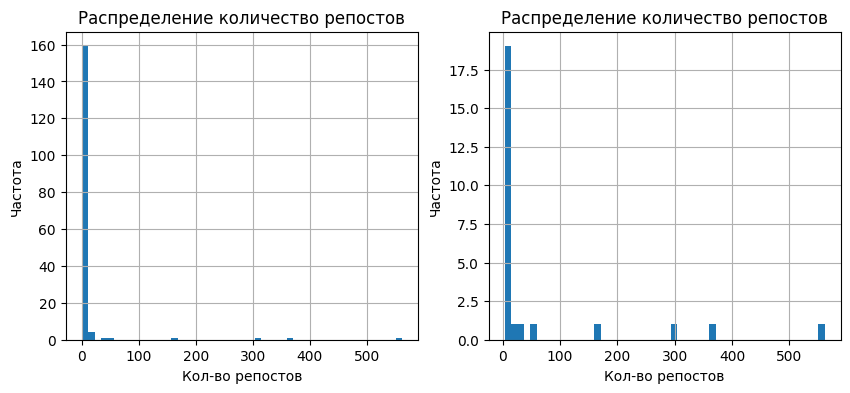

In [122]:
plt.figure(figsize=(10, 4));

plt.subplot(1, 2, 1)
filtered_df['reposts'].hist(bins=50);
plt.title('Распределение количество репостов');
plt.xlabel('Кол-во репостов');
plt.ylabel('Частота');

plt.subplot(1, 2, 2)
filtered_df[filtered_df['reposts'] > 2]['reposts'].hist(bins=50);
plt.title('Распределение количество репостов');
plt.xlabel('Кол-во репостов');
plt.ylabel('Частота');

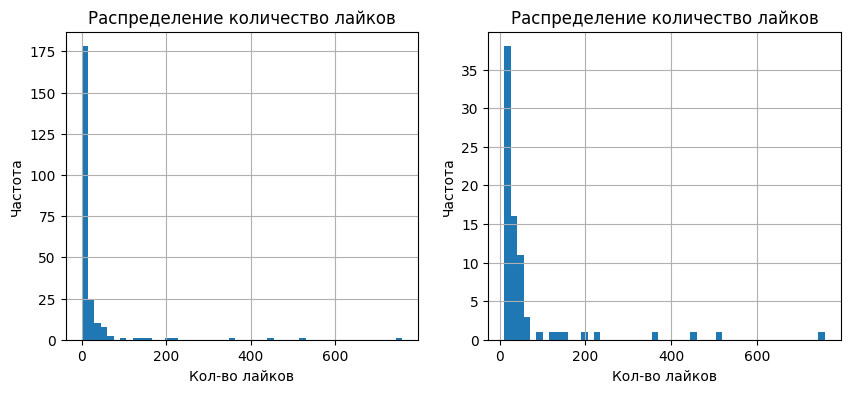

In [125]:
plt.figure(figsize=(10, 4));

plt.subplot(1, 2, 1)
filtered_df['likes'].hist(bins=50);
plt.title('Распределение количество лайков');
plt.xlabel('Кол-во лайков');
plt.ylabel('Частота');

plt.subplot(1, 2, 2)
filtered_df[filtered_df['likes'] > 10]['likes'].hist(bins=50);
plt.title('Распределение количество лайков');
plt.xlabel('Кол-во лайков');
plt.ylabel('Частота');

## Тепловая карта корреляция данных

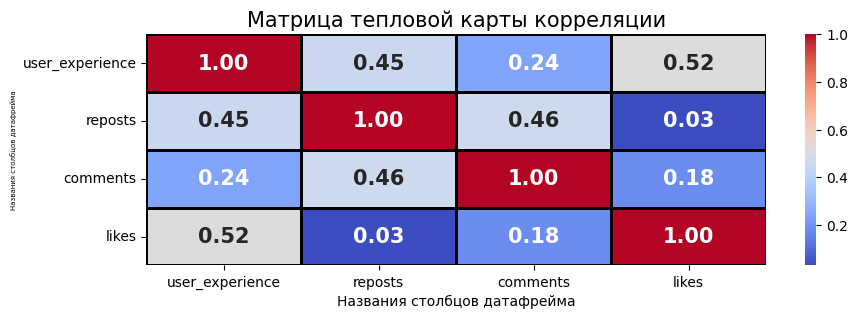

In [124]:
plt.figure(figsize=(10, 3))

# Вычисление матрицы корреляции и округление до двух знаков после запятой, а также устраняем минусы - используем модуль
corr_matrix = np.abs(filtered_df.select_dtypes(include=np.number).corr().round(2))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 15, "weight": "bold"}, 
    linewidths=2,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 5})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица тепловой карты корреляции', fontdict={'size': 15});

plt.show()